# TP MP* / MPI* - Etude d'un circuit RLC série

## Résonance en intensité

On dispose d'une résistance $R=1k\Omega$, d'un condensateur de capacité $C=1 \mu F$ et d'une bobine d'inductance inconnue.

Le circuit a réaliser est une circuit RLC série alimenté par une tension sinusoïdale $u_e(t)$ et le signal de sortie est la tension aux bornes de la résistance $u_R(t)$. 

1. Quelle est la nature du filtre réalisé?

2. Ecrire la fonction de transfert du filtre réalisé et la mettre sous forme canonique.

3. En exploitant la résonance en intensité, déterminer la valeur de l'inductance de la bobine le plus précisément possible. Décrire le protocole mis en oeuvre.

## Diagramme de Bode

4. Modifier le code ci-dessous afin de tracer le diagramme de Bode du filtre réalisé.

In [9]:
#Importation des bibliotheques utiles dans ce TP
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [10]:
R=1
C=1
L=1

Q=1/R*np.sqrt(L/C)
w0=1/np.sqrt(L*C)
f0=w0/(2*np.pi)

print(Q,w0,f0)

1.0 1.0 0.15915494309189535


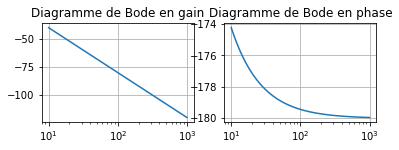

In [11]:
# La fonction de transfert ici H(w)=1/(1+jw-w²)
def H(x):
    return 1/(1 + 1j*x -x**2)

w = np.logspace(1,3) #50 valeurs de w prises dans l'intervalle [10**0 à 10**3]
x=w/w0
phase = np.angle(H(x),'deg')
GdB = 20*np.log10(abs(H(x)))

# Tracé en semilog du module
plt.subplot(221) 
plt.semilogx(x,GdB) 
plt.title('Diagramme de Bode en gain')
plt.grid()

#Tracé en semilog de la phase
plt.subplot(222)
plt.semilogx(x,phase) 
plt.title('Diagramme de Bode en phase')
plt.grid() 


plt.show()

5. Afficher la valeur de la fréquence de résonance trouvée en exploitant le diagramme de Bode et comparer avec la valeur déterminée à l'aide de l'oscilloscope.

In [8]:
# Ecrire la procédure en langage Python pour déterminer la fréquence de résonance attendue avec le diagramme de Bode

### Comportement en hautes fréquences

6. Dans la zone de hautes fréquences, justifier que le filtre se comporte comme un intégrateur.

7. Alimenter le circuit RLC en signal créneau d'amplitude 5 V et de valeur moyenne 1 V.

8. Vérifier expérimentalement le caractère intégrateur du circuit en hautes fréquences.

9. Modifier le code ci-dessous pour simuler le filtrage d'un signal créneau dans les conditions de l'expérience.

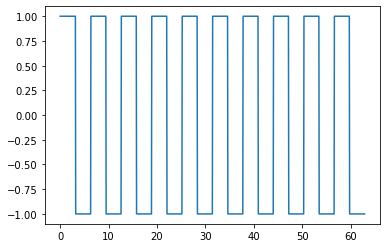

In [18]:
f=f0 #fréquence du signal d'entrée à choisir
tf=10*1/f #durée de la simulation à choisir
fe=100*f  #Fréquence d'échantillonnage (vous pouvez laisser comme ça)
t = np.arange(start=0,stop=tf,step=1.0/fe)
Ve=signal.square(2 * np.pi * f * t)# Signal à paramétrer
plt.plot(t, Ve)
plt.show()

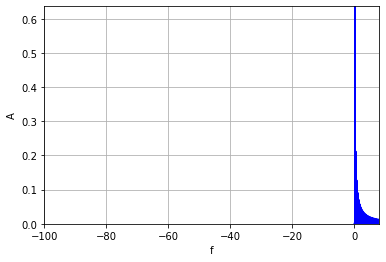

In [19]:
# Tracé du spectre du signal d'entrée

N=len(Ve) #Nombre de points
spectreIN = abs(np.fft.fft(Ve))/N #Décomposition en série de Fourier du signal d'entrée
freq=np.arange(N)/tf #axe des fréquences

plt.plot(freq,spectreIN,'b')
plt.xlabel('f')
plt.ylabel('A')
plt.xlim(-100,fe/2)
plt.ylim(0,spectreIN.max())
plt.grid()

In [20]:
# Application du filtre pour obtenir le signal de sortie

spectreOUT=np.zeros(len(freq))
spectreOUT[0]=spectreIN[0] #composante continue
spectreOUT[1:]=abs(H(2*np.pi*freq[1:]))*spectreIN[1:]  #Vs=H*Ve appliqué à chaque composante du spectre

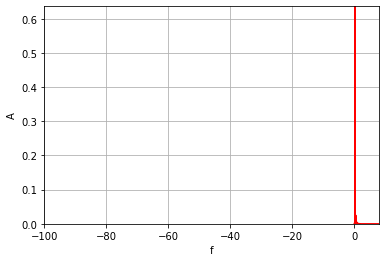

In [21]:
plt.plot(freq,spectreOUT,'r')
plt.xlabel('f')
plt.ylabel('A')
plt.xlim(-100,fe/2)
maxi=spectreOUT[1:].max() #Composante continue non filtrée donc très grande par rapports aux autres termes.
plt.ylim(0,maxi)
plt.grid()

C:\Users\cboisseleau\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


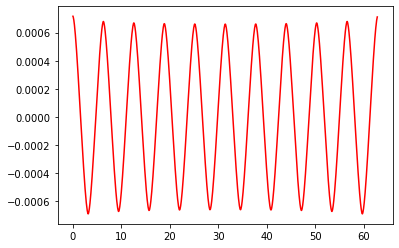

In [22]:
Vs=np.fft.ifft(spectreOUT) #Reconstitution du signal de sortie à partir de son spectre
plt.plot(t,Vs,'r')
plt.show()

10. Comparer le résultat de la simulation avec le signal de sortie obtenu sur l'oscilloscope.